# Image Processing, Python and Linear Algebra

This notebook will guide you through image representation in Python and the PCA algorithm applied for facial recognition. This notebook contains an excerpt the [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126/) by Jake VanderPlas



In [8]:
#Load required libraries

import fnmatch
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tqdm import tqdm
import random
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

In [9]:
#Helper function to plot gallery of images

def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())

#  PCA Algorithm

In [14]:
#Load facial recognition dataset

faces = fetch_lfw_people(min_faces_per_person=100)

n = len(faces.images)
print("loaded %d face images" % n)

loaded 1140 face images


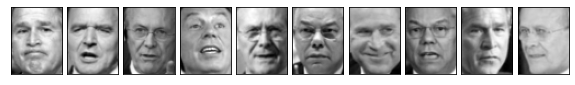

In [13]:
# Explore the dataset

n_samples, h, w = faces.images.shape

# Plot the results
fig, ax = plt.subplots(1, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')

    



In [15]:
# Create the data used to train the PCA algorithm

n_components = 100

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, faces.data.shape[0]))


pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(faces.data)


eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 100 eigenfaces from 1140 faces


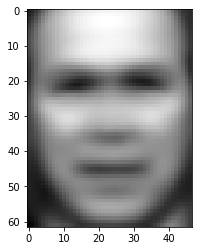

In [11]:
#Let's have a look at the 'average' face as detected by the PCA algorithm!

meanface = pca.mean_.reshape((h, w))
plt.imshow(meanface, cmap='binary_r')

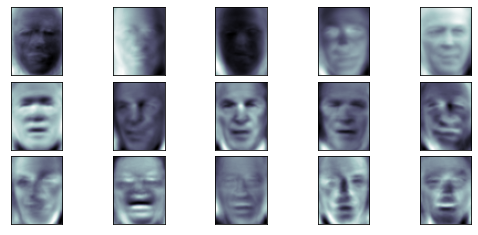

In [12]:
#Let's have a look at the top 15 eigenfaces!

fig, axes = plt.subplots(3, 5, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(h, w), cmap='bone')

In [13]:
# Compute the components and projected faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

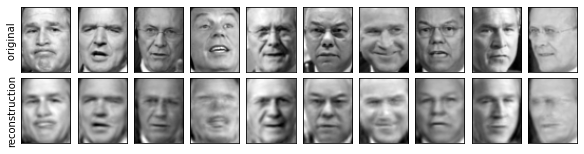

In [15]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('original ')
ax[1, 0].set_ylabel('reconstruction');